In [2]:
import pandas as pd
import numpy as np

In [3]:
music_df = pd.read_csv("music_clean.csv")
music_df.head()

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,Jazz
1,37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,Jazz
2,37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,Jazz
3,36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,Jazz
4,35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,Jazz


In [4]:
music_df.genre.unique()

array(['Jazz', 'Rap'], dtype=object)

## Encode Data

In [5]:
# Create music_dummies
music_dummies = pd.get_dummies(music_df, drop_first=True)

# Print the new DataFrame's shape
print("Shape of music_dummies: {}".format(music_dummies.shape))

Shape of music_dummies: (1000, 13)


In [6]:
music_dummies.head()

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre_Rap
0,36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,0
1,37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,0
2,37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,0
3,36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,0
4,35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,0


## Missing Values

In [7]:
students = [[85, 'M', 'verygood', 15], [95, 'F', 'excellent',19], [75, None, 'good', None],
            [np.NaN, 'M', 'average', None], [70, 'M', 'good',14],
            [np.NaN, None, 'verygood',20], [92, 'F', 'verygood',14],
            [98, 'M', 'excellent',None]]

In [8]:
dfstd = pd.DataFrame(students, columns=['marks', 'gender', 'result', "number"])
dfstd

,marks,gender,result,number
0,85.0,M,verygood,15.0
1,95.0,F,excellent,19.0
2,75.0,None,good,NaN
3,NaN,M,average,NaN
4,70.0,M,good,14.0
5,NaN,None,verygood,20.0
6,92.0,F,verygood,14.0
7,98.0,M,excellent,NaN


In [9]:
X_cat = dfstd["gender"].values.reshape(-1, 1)
X_num = dfstd[["marks","number"]].values

In [10]:
X_cat

array([['M'],
       ['F'],
       [None],
       ['M'],
       ['M'],
       [None],
       ['F'],
       ['M']], dtype=object)

In [11]:
from sklearn.impute import SimpleImputer

imp_cat = SimpleImputer(strategy="most_frequent",missing_values=None)
X_cat = imp_cat.fit_transform(X_cat)

In [12]:
X_cat

array([['M'],
       ['F'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['F'],
       ['M']], dtype=object)

In [13]:
X_num

array([[85., 15.],
       [95., 19.],
       [75., nan],
       [nan, nan],
       [70., 14.],
       [nan, 20.],
       [92., 14.],
       [98., nan]])

In [14]:
imp_num = SimpleImputer()
X_num = imp_num.fit_transform(X_num)

In [15]:
X_num

array([[85.        , 15.        ],
       [95.        , 19.        ],
       [75.        , 16.4       ],
       [85.83333333, 16.4       ],
       [70.        , 14.        ],
       [85.83333333, 20.        ],
       [92.        , 14.        ],
       [98.        , 16.4       ]])

## Centering and Scaling

In [16]:
music_df[["duration_ms","loudness","speechiness"]].describe()

,duration_ms,loudness,speechiness
count,1.000000e+03,1000.000000,1000.000000
mean,2.172204e+05,-8.253305,0.077879
std,1.175582e+05,5.158523,0.089451
min,-1.000000e+00,-38.718000,0.023400
25%,1.806562e+05,-9.775500,0.033100
50%,2.163000e+05,-6.855000,0.043600
75%,2.605025e+05,-4.977750,0.074950
max,1.617333e+06,-0.883000,0.710000


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# create target and features
X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values

# split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
scaler = StandardScaler()
# scale both training and test set
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(np.mean(X), np.std(X))
print(np.mean(X_train_scaled), np.std(X_train_scaled))

20666.582585618085 68890.98734103922
3.5971225997855074e-16 0.9999999999999996


## Pipelines

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
# create steps
steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier(n_neighbors=6))]

# Instantiate pipeline
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=21)
knn_scaled = pipeline.fit(X_train, y_train)
y_pred = knn_scaled.predict(X_test)
print(knn_scaled.score(X_test, y_test))

0.87


In [19]:
# unscaled Data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=21)
knn_unscaled = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)
print(knn_unscaled.score(X_test, y_test))

0.855


## Bonus: Comparing Model Performance

In [20]:
# import necessary libraries
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# creates your data
X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values
# split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# scale Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

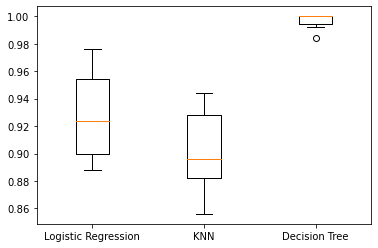

In [21]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

results = []

for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)
    
plt.boxplot(results, labels=models.keys())
plt.show()

In [22]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print("{} Test Set Accuracy: {}".format(name, test_score))

Logistic Regression Test Set Accuracy: 0.864
KNN Test Set Accuracy: 0.888
Decision Tree Test Set Accuracy: 1.0
